# Preambolo
In questo notebook punto a visualizzare alcune caratteristiche dei punti nel dataset. Nello specifico produrrò dei boxplot per comprendere come è distribuita la feature numerica ADC tra le label di riferimento (0 per 2 e 5, 1 per 1 e 6, 3 per 3 e 4 per 4) e successivamente dei grafici a barre per mettere in risalto la frequenza assoluta e relativa dei valori assunti dalle restanti variabili categoriche per ciascuna label di riferimento

# Moduli e librerie

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Importo dataset

In [2]:
df = pd.read_excel('/home/sam/tirocinio/DB PAROTIDE DEF_corretto.xlsx', sheet_name='Sheet7')
df = df.loc[df['ESCLUDERE'] == 0]
df.reset_index(inplace = True)
df = df.loc[df['COD ISTO'] != 6]
df.reset_index(inplace = True)
df = df[['Segni macro malignità', 'ADC', 'TIC type', 'T2','COD ISTO']]
df['ADC'] = df['ADC'].apply(lambda s: str(s).replace(',', '.')).astype(float)
df['ADC'] = df['ADC'].apply(lambda s: str(s).replace(',', '.')).astype(float)
df['COD ISTO'].value_counts()

3    53
4    27
1    12
5     6
2     5
Name: COD ISTO, dtype: int64

# Boxplots

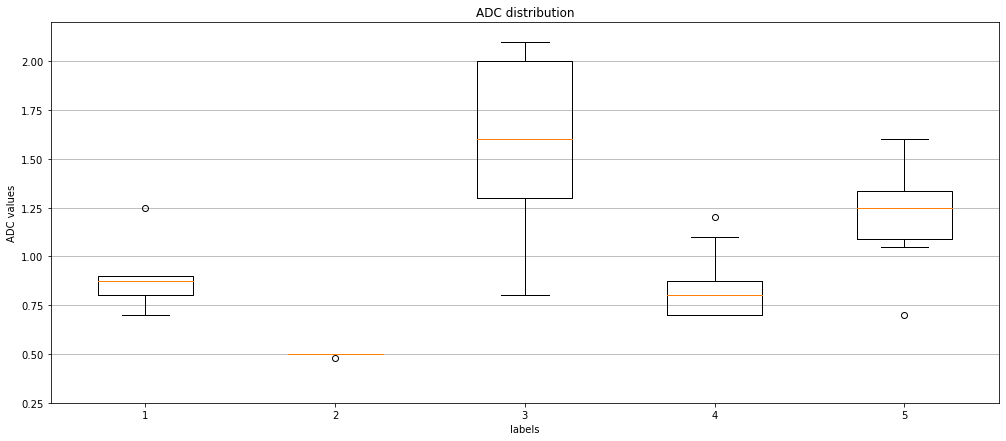

In [3]:
data = []

for n in range(1,6):
    data.append(df[df['COD ISTO'] == n]['ADC'])

plt.boxplot(data, notch = False)
plt.title('ADC distribution')

ax = plt.gca()
ax.set_xlabel('labels')
ax.set_ylabel('ADC values')
ax.set_xticklabels(['1','2','3','4','5'])
ax.set_ylim((0.25,2.2))
ax.yaxis.grid(True)

fig = plt.gcf()
fig.set_size_inches(17, 7)

plt.show()

# Grafici a barre

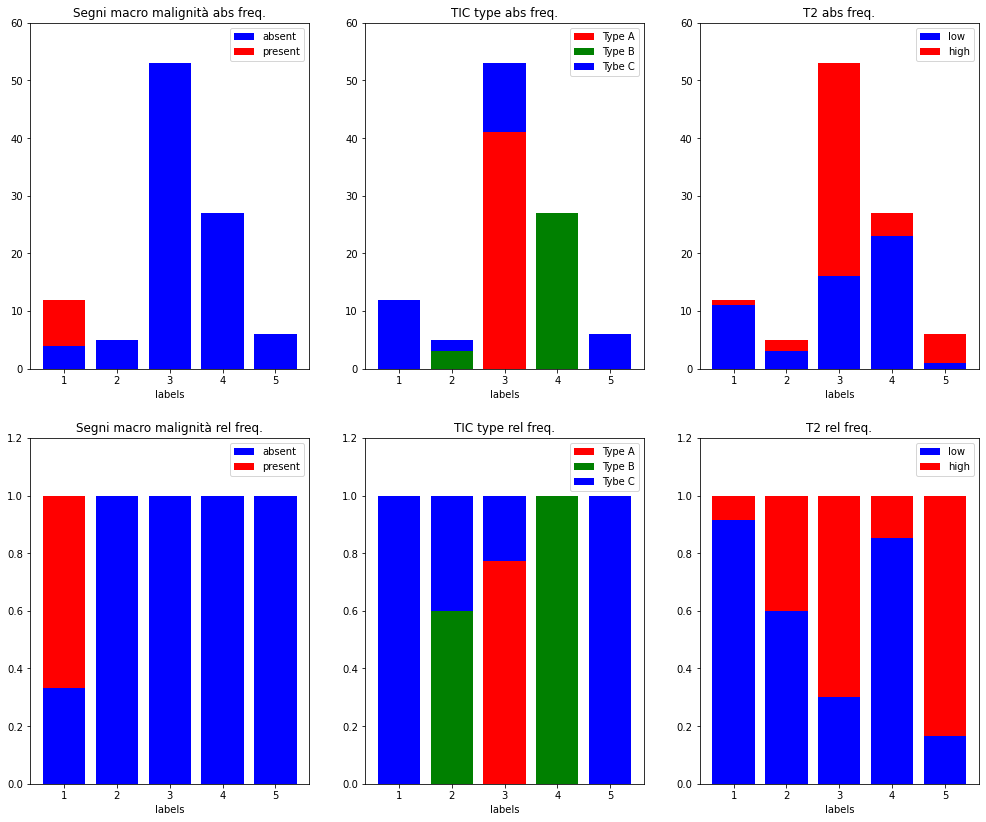

In [4]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches((17,14))
labels = ('1','2','3','4','5')

data = []

for n in range(1,6):
    data.append(df[df['COD ISTO'] == n])

#Segni macro malignità frequenze assolute e relative
color_absent = 'b'
color_present = 'r'

data_absent = [d['Segni macro malignità'].value_counts()[0] for d in data]
data_present = [sum(d['Segni macro malignità']) for d in data]

ax[0][0].bar(labels, data_absent, color = color_absent)
ax[0][0].bar(labels, data_present, bottom = data_absent, color = color_present)
ax[0][0].set_title('Segni macro malignità abs freq.')
ax[0][0].set_xlabel('labels')
ax[0][0].legend(labels = ['absent','present'])
ax[0][0].set_ylim((0,60))

data_absent = [d['Segni macro malignità'].value_counts()[0]/len(d) for d in data]
data_present = [sum(d['Segni macro malignità']/len(d)) for d in data]

ax[1][0].bar(labels, data_absent, color = color_absent)
ax[1][0].bar(labels, data_present, bottom = data_absent, color = color_present)
ax[1][0].set_title('Segni macro malignità rel freq.')
ax[1][0].set_xlabel('labels')
ax[1][0].legend(labels = ['absent','present'])
ax[1][0].set_ylim((0,1.2))


#TIC type

color_A = 'r'
color_B = 'g'
color_C = 'b'


data_A = [ sum([1 if k == 'A' else 0 for k in d['TIC type']]) for d in data]
data_B = [ sum([1 if k == 'B' else 0 for k in d['TIC type']]) for d in data]
data_C = [ sum([1 if k == 'C' else 0 for k in d['TIC type']]) for d in data]


ax[0][1].bar(labels, data_A, color = color_A)
ax[0][1].bar(labels, data_B, bottom = data_A, color = color_B)
ax[0][1].bar(labels, data_C, bottom = [value+data_B[n] for n,value in enumerate(data_A)], color = color_C)
ax[0][1].set_title('TIC type abs freq.')
ax[0][1].set_xlabel('labels')
ax[0][1].legend(labels = ['Type A','Type B','Tybe C'])
ax[0][1].set_ylim((0,60))

data_A = [ sum([1 if k == 'A' else 0 for k in d['TIC type']])/len(d) for d in data]
data_B = [ sum([1 if k == 'B' else 0 for k in d['TIC type']])/len(d) for d in data]
data_C = [ sum([1 if k == 'C' else 0 for k in d['TIC type']])/len(d) for d in data]


ax[1][1].bar(labels, data_A, color = color_A)
ax[1][1].bar(labels, data_B, bottom = data_A, color = color_B)
ax[1][1].bar(labels, data_C, bottom = [value+data_B[n] for n,value in enumerate(data_A)], color = color_C)
ax[1][1].set_title('TIC type rel freq.')
ax[1][1].set_xlabel('labels')
ax[1][1].legend(labels = ['Type A','Type B','Tybe C'])
ax[1][1].set_ylim((0,1.2))

#T2
color_low = 'b'
color_high = 'r'

data_low = [ sum([1 if k == 1 else 0 for k in d['T2']]) for d in data]
data_high = [ sum([1 if k == 0 else 0 for k in d['T2']]) for d in data]

ax[0][2].bar(labels, data_low, color = color_low)
ax[0][2].bar(labels, data_high, bottom = data_low, color = color_high)
ax[0][2].set_title('T2 abs freq.')
ax[0][2].set_xlabel('labels')
ax[0][2].legend(labels = ['low','high'])
ax[0][2].set_ylim((0,60))

data_low = [ sum([1 if k == 1 else 0 for k in d['T2']])/len(d) for d in data]
data_high = [ sum([1 if k == 0 else 0 for k in d['T2']])/len(d) for d in data]


ax[1][2].bar(labels, data_low, color = color_low)
ax[1][2].bar(labels, data_high, bottom = data_low, color = color_high)
ax[1][2].set_title('T2 rel freq.')
ax[1][2].set_xlabel('labels')
ax[1][2].legend(labels = ['low','high'])
ax[1][2].set_ylim((0,1.2))


plt.show()